In [1]:
import pandas as pd 
import numpy as np 

################# Machine Learning ################
import statsmodels
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.outliers_influence import variance_inflation_factor

################# Data Visualization ################
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
fish = pd.read_csv(r"C:\Users\Dheeraj Rane\Downloads\LinearRegressionusingPython\Linear Regression using Python\Fish_dataset.csv")
fish.head(3)

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961


In [3]:
df1 = fish.drop('Species',axis=1)
df1

,Weight,Length1,Length2,Length3,Height,Width
0,242.0,23.2,25.4,30.0,11.5200,4.0200
1,290.0,24.0,26.3,31.2,12.4800,4.3056
2,340.0,23.9,26.5,31.1,12.3778,4.6961
3,363.0,26.3,29.0,33.5,12.7300,4.4555
4,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...
154,12.2,11.5,12.2,13.4,2.0904,1.3936
155,13.4,11.7,12.4,13.5,2.4300,1.2690
156,12.2,12.1,13.0,13.8,2.2770,1.2558
157,19.7,13.2,14.3,15.2,2.8728,2.0672


In [4]:
fish.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [5]:
fish1 = np.sqrt(df1)
fish1


,Weight,Length1,Length2,Length3,Height,Width
0,15.556349,4.816638,5.039841,5.477226,3.394113,2.004994
1,17.029386,4.898979,5.128353,5.585696,3.532704,2.074994
2,18.439089,4.888763,5.147815,5.576737,3.518210,2.167049
3,19.052559,5.128353,5.385165,5.787918,3.567913,2.110806
4,20.736441,5.147815,5.385165,5.830952,3.527605,2.265833
...,...,...,...,...,...,...
154,3.492850,3.391165,3.492850,3.660601,1.445822,1.180508
155,3.660601,3.420526,3.521363,3.674235,1.558846,1.126499
156,3.492850,3.478505,3.605551,3.714835,1.508973,1.120625
157,4.438468,3.633180,3.781534,3.898718,1.694934,1.437776


In [6]:
fish1.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,17.716719,5.029283,5.233873,5.487472,2.902346,2.057927
std,9.218392,0.979548,1.014279,1.059127,0.742191,0.428459
min,0.000000,2.738613,2.898275,2.966479,1.314686,1.023523
25%,10.954451,4.364627,4.582576,4.811442,2.438195,1.840012
50%,16.522712,5.019960,5.224940,5.422177,2.790340,2.061189
75%,25.495098,5.718391,5.958040,6.296823,3.516518,2.363154
max,40.620192,7.681146,7.962412,8.246211,4.353964,2.853419


<AxesSubplot:>

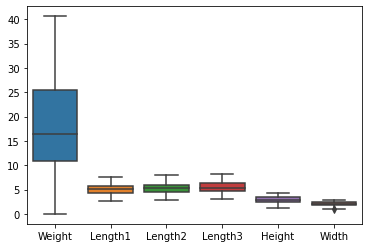

In [7]:
sns.boxplot(data=fish1)

In [8]:
outlier_width=2.363154-1.5*(2.363154-1.840012)
outlier_width

1.5784409999999998

In [9]:
fish1['Width']=np.where(fish1['Width']<outlier_width,outlier_width,fish1['Width'])
fish1

,Weight,Length1,Length2,Length3,Height,Width
0,15.556349,4.816638,5.039841,5.477226,3.394113,2.004994
1,17.029386,4.898979,5.128353,5.585696,3.532704,2.074994
2,18.439089,4.888763,5.147815,5.576737,3.518210,2.167049
3,19.052559,5.128353,5.385165,5.787918,3.567913,2.110806
4,20.736441,5.147815,5.385165,5.830952,3.527605,2.265833
...,...,...,...,...,...,...
154,3.492850,3.391165,3.492850,3.660601,1.445822,1.578441
155,3.660601,3.420526,3.521363,3.674235,1.558846,1.578441
156,3.492850,3.478505,3.605551,3.714835,1.508973,1.578441
157,4.438468,3.633180,3.781534,3.898718,1.694934,1.578441


<AxesSubplot:>

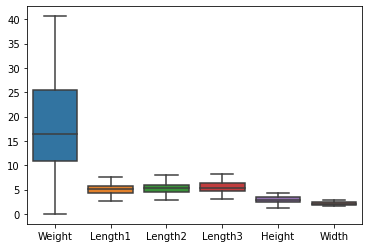

In [10]:
sns.boxplot(data=fish1)

In [11]:
x = fish1.drop('Weight',axis=1)
y = fish1[['Weight']]

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.70,random_state=1)

In [13]:
result = pd.concat([y_train,x_train],axis=1)
result

,Weight,Length1,Length2,Length3,Height,Width
53,16.492423,5.000000,5.196152,5.531727,2.927115,2.184857
117,25.495098,6.041523,6.244998,6.434283,3.337154,2.450102
136,23.237900,6.332456,6.557439,6.767570,2.790340,2.264862
17,26.457513,5.513620,5.744563,6.204837,3.864971,2.279803
77,10.000000,4.024922,4.242641,4.381780,2.285257,1.822526
...,...,...,...,...,...,...
133,18.574176,6.000000,6.204837,6.403124,2.529031,1.994242
137,22.360680,6.480741,6.708204,6.928203,2.638181,2.212691
72,2.428992,2.738613,2.898275,2.966479,1.453272,1.578441
140,30.822070,6.949820,7.190271,7.422937,2.987675,2.484190


In [14]:
result.corr()

,Weight,Length1,Length2,Length3,Height,Width
Weight,1.000000,0.950807,0.953423,0.957771,0.814671,0.963430
Length1,0.950807,1.000000,0.999490,0.993598,0.701353,0.892514
Length2,0.953423,0.999490,1.000000,0.995222,0.714427,0.895105
Length3,0.957771,0.993598,0.995222,1.000000,0.761939,0.896866
Height,0.814671,0.701353,0.714427,0.761939,1.000000,0.803165
Width,0.963430,0.892514,0.895105,0.896866,0.803165,1.000000


<AxesSubplot:>

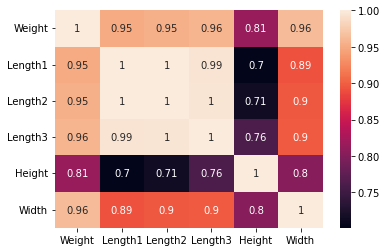

In [15]:
sns.heatmap(result.corr(),annot=True)

<AxesSubplot:xlabel='Width', ylabel='Weight'>

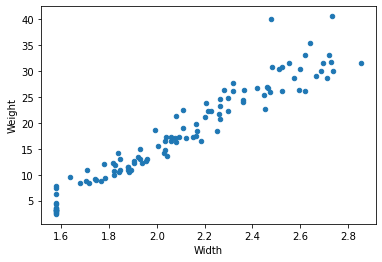

In [16]:
result.plot.scatter(x='Width',y='Weight')

In [17]:
X1=result.drop(['Weight'],axis=1)
series_before = pd.Series([variance_inflation_factor(X1.values, i) 
                           for i in range(X1.shape[1])],  # i=0,1,2
                          index=X1.columns)  # column name
series_before

Length1    37339.509821
Length2    40419.712312
Length3     6939.538909
Height       138.016982
Width        191.390191
dtype: float64

In [18]:
import statsmodels.formula.api as smf
model = smf.ols('Weight ~ Length1+Length2+Length3+Height+Width',data=result).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Weight   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.974
Method:                 Least Squares   F-statistic:                     830.1
Date:                Tue, 24 May 2022   Prob (F-statistic):           1.12e-82
Time:                        16:09:06   Log-Likelihood:                -199.41
No. Observations:                 111   AIC:                             410.8
Df Residuals:                     105   BIC:                             427.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -32.2825      0.978    -32.997      0.000     -34.222     -30.343
Length1        5.5150      5.596      0.985      0.327      -5.581      16.611
Length2       -0.7777      5.387     -0.144      0.885     -11.459       9.904
Length3       -0.5499      2.289     -0.240      0.811      -5.089       3.990
Height         1.8532      0.636      2.914      0.004       0.592       3.114
Width         11.4578      1.231      9.310      0.000       9.018      13.898
==============================================================================
Omnibus:                       39.586   Durbin-Watson:                   2.111
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              134.017
Skew:                           1.196   Prob(JB):                     7.92e-30
Kurtosis:                       7.822   Cond. No.                         537.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
model2 = smf.ols('Weight ~ Height+Width',data=result).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Weight   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     750.8
Date:                Tue, 24 May 2022   Prob (F-statistic):           4.38e-64
Time:                        16:10:03   Log-Likelihood:                -254.93
No. Observations:                 111   AIC:                             515.9
Df Residuals:                     108   BIC:                             524.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -33.9155      1.418    -23.920      0.000     -36.726     -31.105
Height         1.4403      0.523      2.753      0.007       0.403       2.477
Width         22.6835      1.090     20.817      0.000      20.524      24.843
==============================================================================
Omnibus:                       64.706   Durbin-Watson:                   1.870
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              330.967
Skew:                           1.924   Prob(JB):                     1.35e-72
Kurtosis:                      10.534   Cond. No.                         27.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
X1=result.loc[:,['Height', 'Width']]
series_before = pd.Series([variance_inflation_factor(X1.values, i) 
                           for i in range(X1.shape[1])], 
                          index=X1.columns)
series_before

Height    43.708244
Width     43.708244
dtype: float64

In [23]:
result['fitted_value']=model2.fittedvalues #Predicted Value
result['residual']=model2.resid  #Error
result.head()

,Weight,Length1,Length2,Length3,Height,Width,fitted_value,residual
53,16.492423,5.000000,5.196152,5.531727,2.927115,2.184857,19.860679,-3.368257
117,25.495098,6.041523,6.244998,6.434283,3.337154,2.450102,26.467952,-0.972854
136,23.237900,6.332456,6.557439,6.767570,2.790340,2.264862,21.478481,1.759419
17,26.457513,5.513620,5.744563,6.204837,3.864971,2.279803,23.365171,3.092342
77,10.000000,4.024922,4.242641,4.381780,2.285257,1.822526,10.717263,-0.717263


# Linearity

<AxesSubplot:title={'center':'Weight vs Height'}, xlabel='Height', ylabel='Weight'>

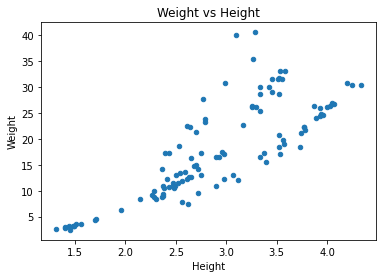

In [24]:
result.plot.scatter(x='Height', y='Weight', title='Weight vs Height')

# Homoscedasity

<AxesSubplot:xlabel='fitted_value', ylabel='residual'>

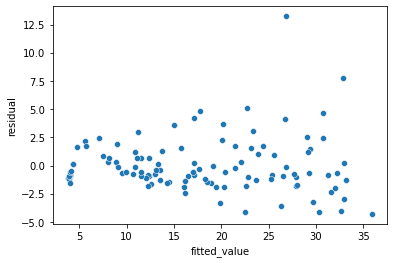

In [26]:
sns.scatterplot(x='fitted_value', y='residual',data=result)

# Normality

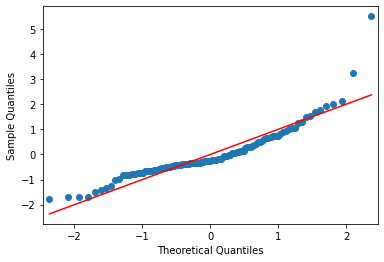

In [27]:
import statsmodels.api as sm
fig = sm.qqplot(result['residual'], fit=True, line='s')
plt.show()

# Model error are IID

<AxesSubplot:ylabel='Frequency'>

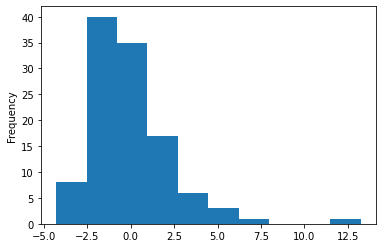

In [28]:
result['residual'].plot.hist()

# Prediction on Test

In [31]:
result_test=pd.concat([x_test,y_test],axis=1)

result_test.head()

,Length1,Length2,Length3,Height,Width,Weight
29,5.787918,6.082763,6.526868,4.353964,2.569630,31.622777
42,4.404543,4.582576,4.868265,2.472772,1.815021,10.954451
14,5.422177,5.656854,6.099180,3.867092,2.273939,24.494897
91,4.527693,4.743416,4.898979,2.419917,1.903681,11.401754
81,4.266146,4.472136,4.582576,2.254329,1.664932,9.219544


In [32]:
result_test['Prediction']=model2.predict(result_test) # predict = all row prediction ( Auto )
result_test.head()

,Length1,Length2,Length3,Height,Width,Weight,Prediction
29,5.787918,6.082763,6.526868,4.353964,2.569630,31.622777,30.643780
42,4.404543,4.582576,4.868265,2.472772,1.815021,10.954451,10.817098
14,5.422177,5.656854,6.099180,3.867092,2.273939,24.494897,23.235225
91,4.527693,4.743416,4.898979,2.419917,1.903681,11.401754,12.752094
81,4.266146,4.472136,4.582576,2.254329,1.664932,9.219544,7.097946


# RMSE for evaluation of model on train data

In [33]:
import math
from sklearn.metrics import mean_squared_error

# calculate the mean squared error
model_mse = mean_squared_error(result['Weight'],result['fitted_value'])

# calulcate the root mean squared error
model_rmse = math.sqrt(model_mse)
# display the output
print("RMSE {:.3}".format(model_rmse))

RMSE 2.41


# RMSE for evaluation of model on test data

In [34]:
import math
from sklearn.metrics import mean_squared_error

# calculate the mean squared error
model_mse = mean_squared_error(result['Height'],result['residual'])

# calulcate the root mean squared error
model_rmse = math.sqrt(model_mse)
# display the output
print("RMSE {:.3}".format(model_rmse))

RMSE 3.85
